In [7]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


In [8]:
iris=load_iris()

In [9]:
x_train,x_test,y_train,y_test=train_test_split(iris.data,iris.target,test_size=0.3,random_state=59)

In [10]:
model=DecisionTreeClassifier()

In [11]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [12]:
y_pred=model.predict(x_test)

In [13]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9333333333333333

In [14]:
from sklearn.model_selection import GridSearchCV

In [15]:
param_grid={
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3]
}

In [16]:
grid_search=GridSearchCV(estimator=model,param_grid=param_grid,cv=5)

In [17]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5]})

In [18]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [19]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [20]:
model_2=DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,min_samples_split=2)

In [21]:
model_2.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=2)

In [22]:
y_pred2=model_2.predict(x_test)

In [23]:
accuracy_score(y_test,y_pred2) # here avoiding the overfitting

0.9111111111111111

In [24]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.375, 0.875, 'x[3] <= 0.7\ngini = 0.662\nsamples = 105\nvalue = [37, 39, 29]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.65\ngini = 0.489\nsamples = 68\nvalue = [0, 39, 29]'),
 Text(0.25, 0.375, 'x[2] <= 5.0\ngini = 0.05\nsamples = 39\nvalue = [0, 38, 1]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 37\nvalue = [0, 37, 0]'),
 Text(0.375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [0, 1, 1]'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.067\nsamples = 29\nvalue = [0, 1, 28]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]')]

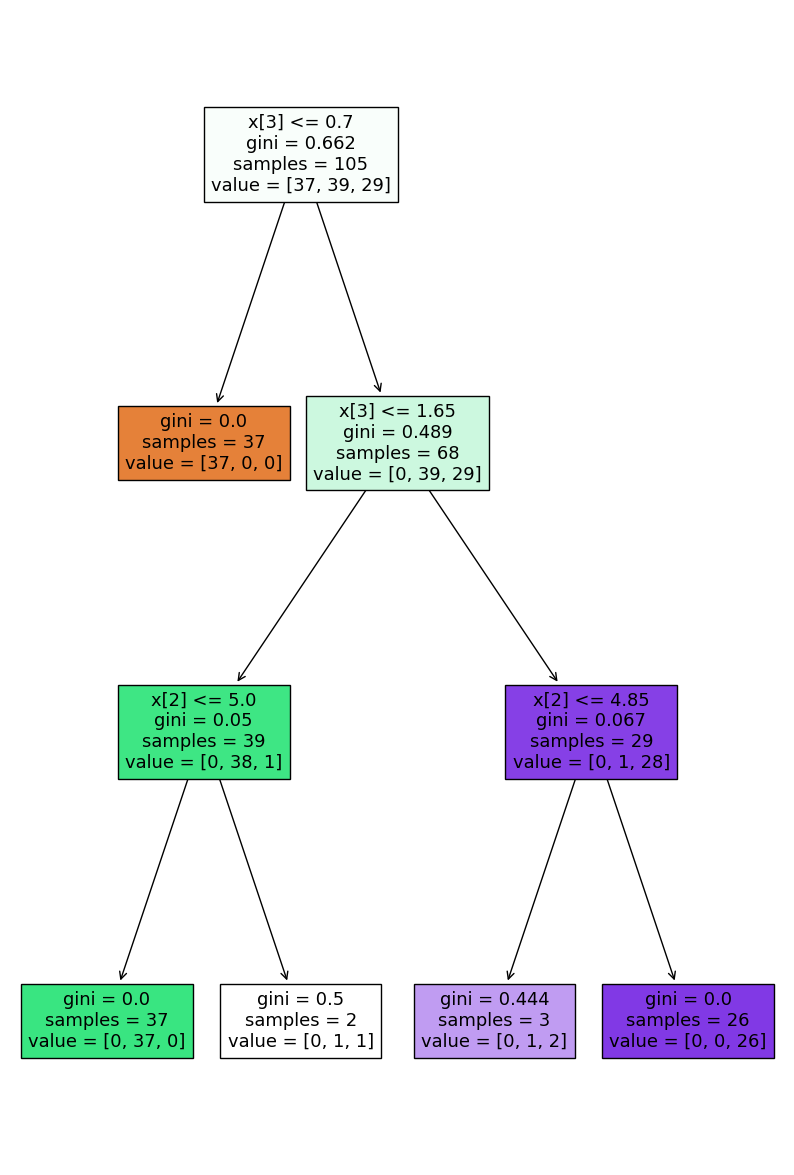

In [27]:
plt.figure(figsize=(10,15))
tree.plot_tree(model_2,filled=True)

In [1]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor


In [2]:
X, y = load_diabetes(return_X_y=True)
regressor = DecisionTreeRegressor(random_state=0)


In [4]:
prediction=cross_val_score(regressor, X, y, cv=10)

In [6]:
np.mean(prediction)

-0.20436414276291687